 # PHYS 404, Homework 6, 3/3/2023

## Undergraduate student:
### A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method and plot height (z) vs time (t).


## Graduate student:
### Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary. The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are seperated by a distance of 1 initially. Initialize the binary velocity so that each binary star will have an eccentricity of 0. Evolve this system to 100 binary orbits, and plot their orbits in the x-y plane. 


initial velocity v0 = 10 m/s

velocity dy/dt = v

dy/dt = v0 + g * t

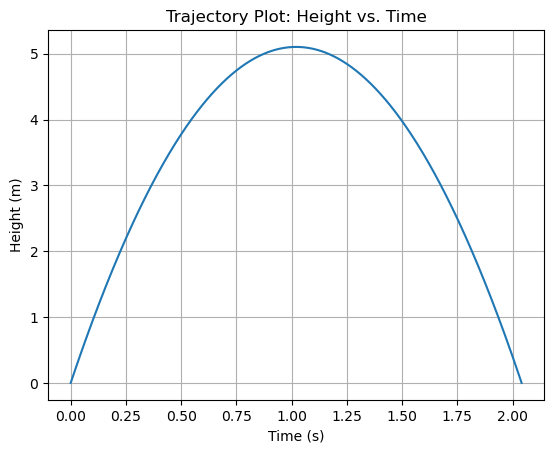

In [46]:
# import all the basics that the program needs
import numpy as np
import matplotlib.pyplot as plt

g = 9.8           # gravity constant
n = 1             # array size, determined by on the amount of equations
h = 0.0001        # iteration step dt
v0 = 10.          # initial velocity v = 10. m/s
y = [0.]          # initial value array that contains initial height y = 0m
t = 0.            # initial time t = 0s
tend = 2 * v0 / g # maixmum flight time

'''
f:
    velocity function
    parameter: t: infinitesimal time
               y: array of initial point values
    return: computed value
'''
def f(t, y):
    f = np.zeros(1)
    f[0] = v0 - g*t
    return f

'''
rk4:
    the fourth order Runge-Kutta method
    compute function's numerical soluton of the ODE
    parmeter: t: infinitesimal time
              h: delta x
              y: an array of function's intial point values
              n: size of the array
'''
def rk4(t, h, y, n):
    # intialize each k terms as array of size n, 
    # to enable the *operator overload for y array
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    # compute each order terms
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y += (k1+2.*(k2+k3)+k4)/6.
    # return the processed array that evaluated height instant
    return y


'''
Fuction main:
'''
yp=[]
tp=[]
# set a loop determined by the time range
while t < tend - h:
    # get the height
    y = rk4(t,h,y,n)
    yp.append(y[0])
    # incrementing the infinitesimal time
    t = t + h
    tp.append(t)


plt.plot(tp,yp)
plt.title('Trajectory Plot: Height vs. Time') 
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.grid(True)
plt.show()